In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
sigma=0.1/np.sqrt(250)
print(sigma)
P=[1]
for i in range(1,250):
    w=np.random.normal(0,1)
    P.append(P[i-1]+sigma*w)

0.00632455532034


In [3]:
price=pd.Series(P)
dp=price.diff().dropna()
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dp.mean(),dp.std(),dp.skew(),dp.kurt()))

mean -0.00002 std 0.00616 skew -0.08733 kurt 0.38527


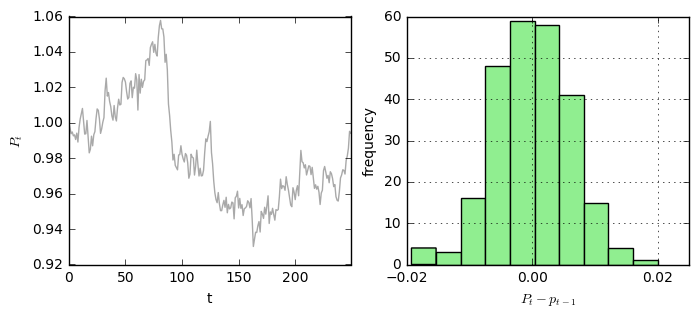

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3.2))
plt.subplot(121)
price.plot(color='darkgray')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.subplot(122)
dp.hist(color='lightgreen')
mx=round(dp.max(),2)
mn=round(dp.min(),2)
plt.xticks([mn,0,mx])
plt.xlabel('$P_t-p_{t-1}$')
plt.ylabel('frequency')

In [8]:
P=[]
dP=[]
high=[0]*250
low=[1]*250
for j in range(1000):
    P0=1
    for i in range(250):
        w=np.random.normal(0,1)
        dp=sigma*w
        P0=P0+dp
        if P0>high[i]:
            high[i]=P0
        if P0<low[i]:
            low[i]=P0
        dP.append(dp)
    P.append(P0)
price=pd.Series(P)
dprice=pd.Series(dP)

mean -0.00000 std 0.00632 skew -0.00735 kurt -0.00736


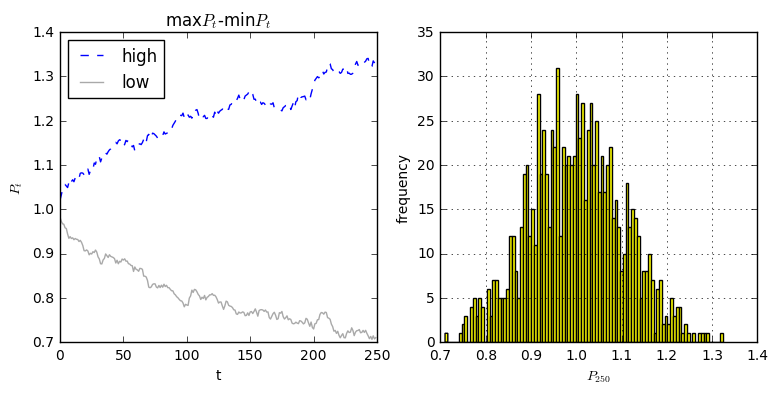

In [9]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.plot(high,label='high',linestyle='--')
plt.plot(low,label='low',color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='yellow')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

([<matplotlib.axis.XTick at 0x7b92cd6710>,
 <a list of 3 Text xticklabel objects>)

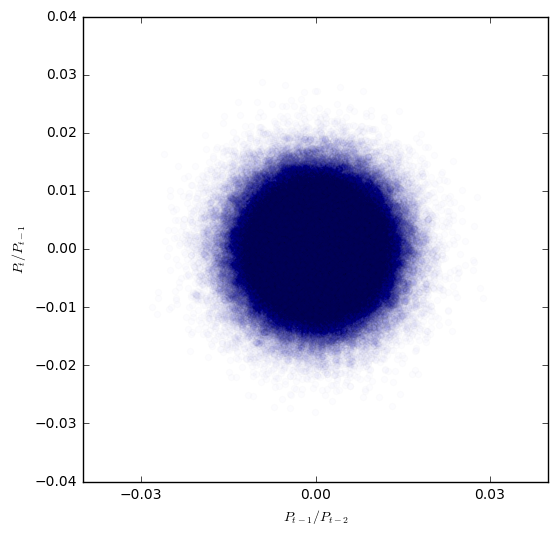

In [11]:
plt.figure(figsize=(6,6))
mx=round(dprice.max(),2)
mn=round(dprice.min(),2)
plt.scatter(dprice,dprice.shift(1),alpha=0.01)
plt.xlabel('$P_{t-1}/P_{t-2}$')
plt.ylabel('$P_t/P_{t-1}$')
plt.xticks([mn,0,mx])

In [12]:
def ar1(beta,sigma,n,m,p0):
    P=[]
    dP=[]
    high=[0]*m
    low=[p0]*m
    alpha=(1-beta)*p0
    sigma_w=sigma*p0
    for j in range(n):
        P0=p0
        for i in range(m):
            w=np.random.normal(0,1)
            P1=beta*P0+alpha+sigma_w*w
            dp=P1-P0
            P0=P1
            if P0>high[i]:
                high[i]=P0
            if P0<low[i]:
                low[i]=P0
            dP.append(dp)
        P.append(P0)
    price=pd.Series(P)
    dprice=pd.Series(dP)
    return price,dprice,high,low

mean 0.00000 std 0.00633 skew 0.00085 kurt -0.00225


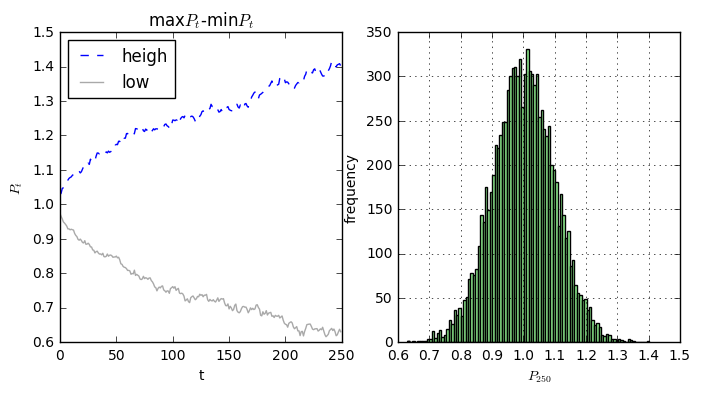

In [14]:
price,dprice,high,low = ar1(0.9999,sigma,10000,250,1)
plt.figure(figsize=(8,4),dpi=1200)
plt.subplot(1,2,1)
plt.plot(high,label="heigh",linestyle='--')
plt.plot(low,label="low",color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='lightgreen')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

([<matplotlib.axis.XTick at 0x7b90b86be0>,
 <a list of 3 Text xticklabel objects>)

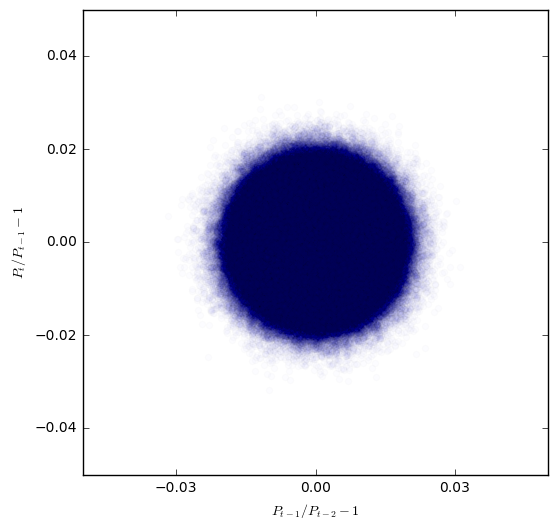

In [16]:
plt.figure(figsize=(6,6))
mx=round(dprice.max(),2)
mn=round(dprice.min(),2)
plt.scatter(dprice,dprice.shift(1),alpha=0.01)
plt.xlabel('$P_{t-1}/P_{t-2}-1$')
plt.ylabel('$P_t/P_{t-1}-1$')
plt.xticks([mn,0,mx])

mean -0.00000 std 0.00634 skew -0.00144 kurt 0.00239


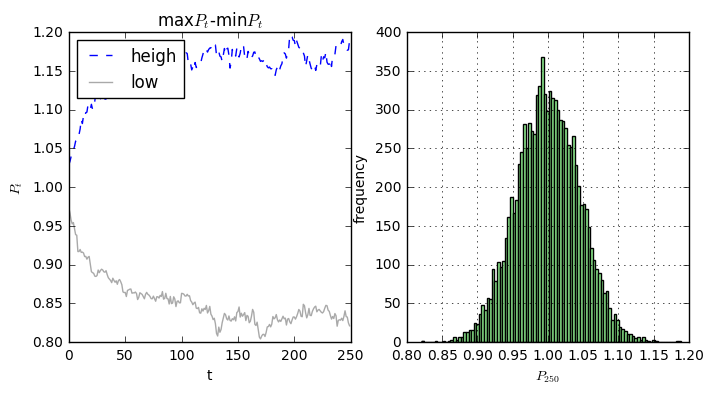

In [17]:
price,dprice,high,low = ar1(0.99,sigma,10000,250,1)
plt.figure(figsize=(8,4),dpi=1200)
plt.subplot(1,2,1)
plt.plot(high,label="heigh",linestyle='--')
plt.plot(low,label="low",color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='lightgreen')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

mean -0.00000 std 0.00730 skew -0.00030 kurt 0.00628


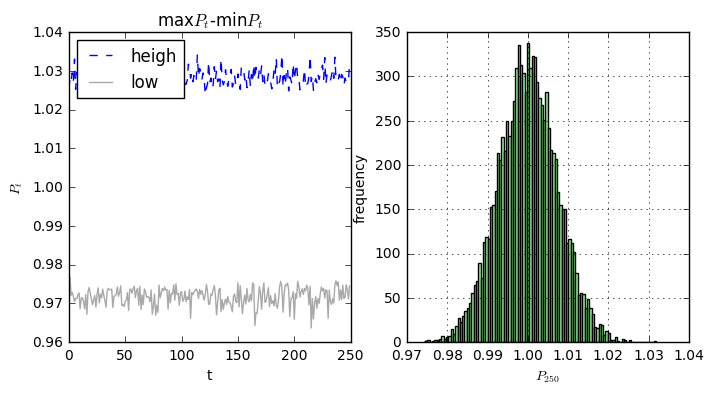

In [18]:
price,dprice,high,low = ar1(0.5,sigma,10000,250,1)
plt.figure(figsize=(8,4),dpi=1200)
plt.subplot(1,2,1)
plt.plot(high,label="heigh",linestyle='--')
plt.plot(low,label="low",color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='lightgreen')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

mean 0.00000 std 0.00633 skew -0.00247 kurt 0.00101


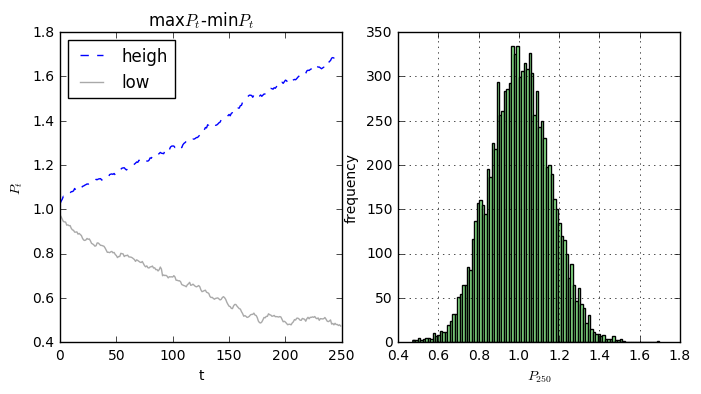

In [19]:
price,dprice,high,low = ar1(1.003,sigma,10000,250,1)
plt.figure(figsize=(8,4),dpi=1200)
plt.subplot(1,2,1)
plt.plot(high,label="heigh",linestyle='--')
plt.plot(low,label="low",color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='lightgreen')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

mean -0.00000 std 0.00635 skew -0.00186 kurt 0.00055


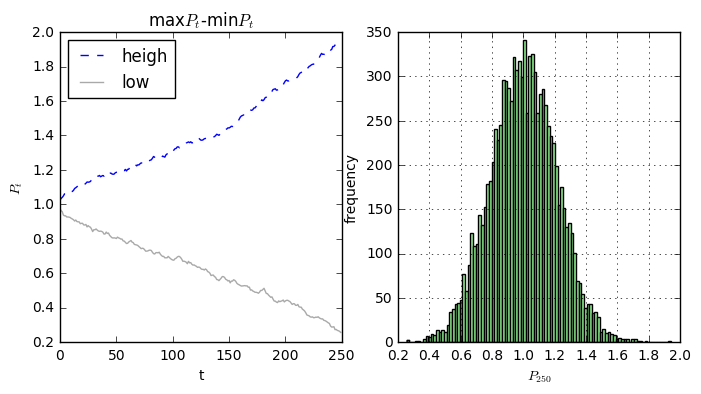

In [20]:
price,dprice,high,low = ar1(1.005,sigma,10000,250,1)
plt.figure(figsize=(8,4),dpi=1200)
plt.subplot(1,2,1)
plt.plot(high,label="heigh",linestyle='--')
plt.plot(low,label="low",color='darkgray')
plt.title('max$P_t$-min$P_t$')
plt.xlabel('t')
plt.ylabel('$P_t$')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
price.hist(bins=100,color='lightgreen')
plt.xlabel('$P_{250}$')
plt.ylabel('frequency')
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))

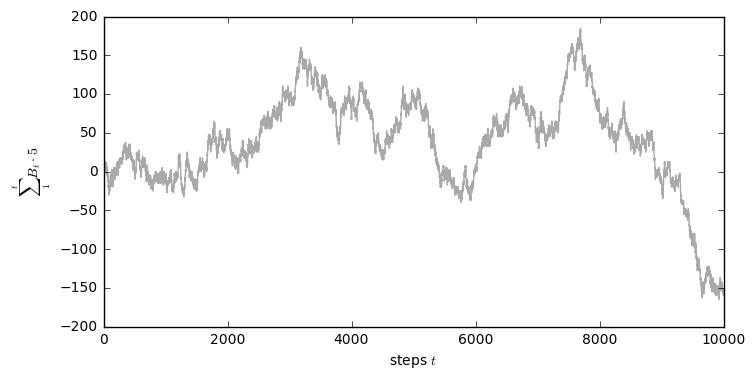

In [23]:
def bernoulli(p,x,N,p0):
    s = (np.random.binomial(1,p,N)-0.5)*x
    P0=p0
    P=[]
    for i in range(N):
        P0=P0+s[i]
        P.append(P0)
    return P
P=bernoulli(0.5,5,10000,0)
plt.figure(figsize=(8,4))
plt.plot(P,color='darkgray')
plt.xlabel('steps $t$')
plt.ylabel('$\sum_1^t B_t \cdot 5$')

mean 0.05201 std 355.99956 skew -0.04212 kurt -0.05281


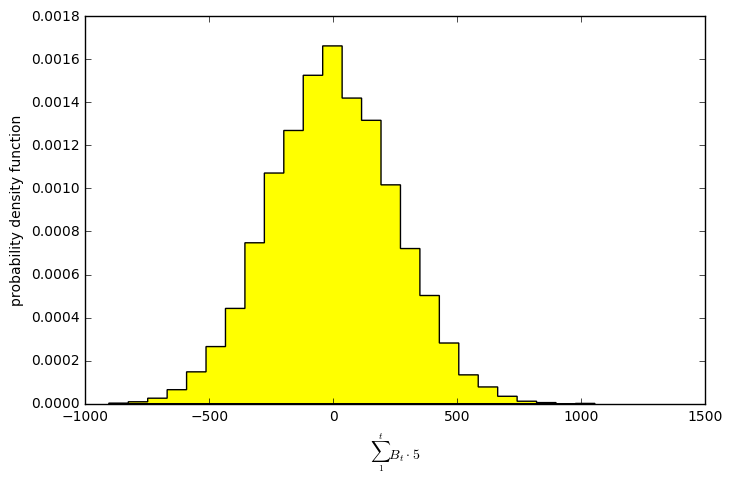

In [25]:
N=10000
M=10000
Q=[]
for i in range(N):
    P=bernoulli(0.5,5,M,0)
    Q.append(P[M-1])
plt.figure(figsize=(8,5))
plt.figure.left=-0.1
plt.hist(Q,normed=True,histtype='stepfilled',color='yellow',bins=25)
plt.xlabel('$\sum_1^t B_t \cdot 5$')
plt.ylabel('probability density function')
price=pd.Series(Q)
dprice=price.diff()
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
     %(dprice.mean(),dprice.std(),dprice.skew(),dprice.kurt()))